# <span style="color:blue">Amostragem e Quantização de Sinais Contínuos</span>

### Introdução

<p>**Amostragem** de um sinal contínuo $x(t)$ produz réplicas do espectro $X(\omega)=F\{x(t)\}$ centradas em frequências múltiplas de $\omega_s=2\pi f_s=2\pi/T_s$. Supondo o sinal contínuo real ($x(t)\in\mathbb{R}$) e limitado em frequência, $|X(\omega)|=0$ para $|\omega|>\omega_{máx}$ onde $\omega_{máx}$ é a frequência máxima de $x(t)$. As réplicas espectrais devidas à amostragem não se sobrepõem se o **Teorema de Nyquist** (da amostragem) for observado: $\omega_s \geq 2⋅\omega_{máx}$. No caso da amostragem Nyquist (crítica), a frequência de amostragem é escolhida comos $\omega_s=2⋅\omega_{máx}$.

<p>Processadores digitais de sinal (DSP's) e processadores de propósito geral (GPP's) só podem realizar operações aritméticas num intervalo limitado de números. Até agora, consideramos sinais discretos com valores de amplitude contínuos. Eles não podem ser manipulados pelos processadores dessa maneira. **Quantização** é o processo de mapeamento de valores de entrada de um conjunto grande (geralmente um conjunto contínuo) para valores de saída em um conjunto menor (contável), geralmente com um número finito de elementos. *Arredondamento* e *truncamento* são exemplos típicos de processos de quantização.

<p>A quantização escalar é uma operação instantânea e sem memória. Pode ser aplicada ao sinal de amplitude contínua, também referido como sinal analógico ou ao sinal discreto (amostrado temporalmente). O sinal discreto quantizado é denominado  **sinal digital**. 
<p>Computadores com placas de áudio podem ser usados para explorar aspectos de <B>AMOSTRAGEM</B> e <B>ALIASING</B>. <P>Neste laboratório vamos gerar sinais e verificar os efeitos da reprodução com diferentes frequências de amostragem.

### Fundamentação Teórica - Amostragem

Considere a **digitalização** (amostragem + quantização + codificação) de um sinal analógico, $x_a(t)$, com frequência de
amostragem $f_s = 1/T_s$, medida em Hz ou amostra/s. A sequência resultante da amostragem (em geral um vetor de amostras) é representada
por: 

$$x[n]=x_a(n.T_s)$$

onde $t=n.T_s=\frac{n}{f_s}$ são os instantes de amostragem do sinal analógico.<p>Seja a digitalização de um sinal cossenoidal de frequência $f$:
<p>$$x_a(t)=A.cos(\omega.t+\theta)=A.cos(2\pi.f.t+\theta)$$
<p>em que $\omega$ é medida em **rad/s**, $f$ é medida em **Hz** e $\theta$ é medida em **rad**.

A discretização temporal (amostragem) desse sinal é dado por:
<p>$$x[n]=x_a(n.T_s)=A.cos(2\pi.f.n.T_s+\theta)=A.cos(2\pi.\frac{f}{f_s}.n+\theta)=A.cos(\Omega.n+\theta)$$
<p>onde: $\Omega=2\pi.f/f_s$ é a "freq. digital" medida em **amostra/ciclo**, e $\bar{f}=f/f_s$ é a freq. normalizada medida em **amostras**.

Portanto, a faixa de variação de valores para as frequências do sinal em tempo contínuo e tempo
discreto são:
<p>$$-\infty \lt f \lt \infty\;\;\;\;\;\textrm{[Hz]}\;\;\;\;\,\Leftrightarrow\;\;\;\;-f_s/2 \lt \bar{f}  \lt f_s/2\;\;\;\;\textrm{[ciclo/amostra]}$$
<p>$$-\infty \lt \omega \lt \infty\;\;\;\textrm{[rad/s]}\;\;\Leftrightarrow\;\;\;\;-\pi \lt \Omega \lt \pi\;\;\;\;\;\;\textrm{[rad/amostra]}\;\;\;\;\;\;$$

EXEMPLO: Análise do efeito **Aliasing**

<p>$x_1(t)=cos(2\pi.10t)\;\;\;f_1=10\;$Hz;$\;\;\;\rightarrow x_1[n]=cos(2\pi.\frac{10}{40}n)=cos(\frac{\pi}{2}n)$
<p>$x_2(t)=cos(2\pi.50t)\;\;\;f_2=50\;$Hz;$\;\;\;\rightarrow x_2[n]=cos(2\pi.\frac{50}{40}n)=cos(\frac{5\pi}{2}n)=cos(2\pi n+\frac{\pi}{2}n)=cos(\frac{\pi}{2}n)$
<p>$x_1[n]=x_2[n]\;\;\;\;\;$**ALIASING**: efeito que faz com que diferentes sinais se tornem indistinguíveis quando amostrados inadequadamente.

### Sinal Básico

Verifique se o <i>script</i> seguinte funciona como esperado, ou seja, se um tom LÁ (440 Hz) é reproduzido durante 2 segundos.

In [1]:
% pylab inline
from numpy import arange, cos, pi, int8, fft
from pyaudio import PyAudio
from pylab import plot, show
from scipy.io import loadmat

def toca(tom,fs=8000):
  x = PyAudio()
  fluxo = x.open(format=x.get_format_from_width(1), channels=1, rate=fs, output=True)
  amostras = ((tom + 1.) * 127.5).astype(int8)
  fluxo.write(amostras.tostring())

Fs = 8000                     # frequência de amostragem
Ts = 1./Fs                    # intervalo de amostragem
tfinal = 2                    # qtde de tempo
n = arange(0,tfinal/Ts)       # índice temporal
ftom = 440                    # freq. do LA central (’A’)
tom = cos(2*pi*ftom*n*Ts)     # gera amostras do sinal senoidal
toca(tom,Fs)                  # toca o sinal (em 8000 sa/seg)

# Fonte: github.com/lneuhaus/pysine/blob/master/pysine/pysine.py

A partir dos comentários no <i>script</i>, deve estar claro o que está acontecendo. Nós configuramos os parâmetros do sistema, geramos amostras do sinal e o reproduzimos no alto-falante. Por padrão, o comando de som é reproduzido em 8000 amostras/s. <p>Experimente amplitudes diferentes para o cosseno; escolha uma amplitude que proporcione um volume de som  confortável pois você vai ouvir esse sinal muitas vezes. <p>Plote o espectro de frequências do tom gerado (valor absoluto da FFT do sinal: <span style="font-family:Courier New; font-size:1em;">*plot(abs(fft.fft(tom)))*</span> ). 
<p>Explique as abscissas com **pulsos** e porque esses pulsos aparecem nessas abscissas.

### Subamostragem

O sinal pode ser subamostrado pegando uma amostra e desprezando a seguinte...

In [ ]:
tom2 = tom[::2]
toca(tom2,Fs)                 # reproduz o sinal na freq. original

Para efeito de comparação toque esse sinal com a metade da frequência original:

In [ ]:
toca(tom2,int(Fs/2))          # reproduz o sinal numa taxa reduzida

Como soa o sinal <span style="font-family:Courier New; font-size:1em;">tom2</span>? Como se compara a frequência deste sinal com a do primeiro sinal? O que se percebe ao ouvir ambos tons? Trace o espectro do sinal <span style="font-family:Courier New; font-size:1em;">tom2</span> nos moldes do que foi feito para o sinal <span style="font-family:Courier New; font-size:1em;">tom</span>. Explique que caixas têm picos e por quê. <p>Explique as abscissas com **valores** e **porque** esses valores aparecem nessas abscissas

### Outras Decimações

Vamos experimentar outras decimações, ouvindo e plotando os espectros dos sinais decimandos. <p>Em particular, subamostre o sinal por 3,5,8,9,10,15. O que acontece na decimação a partir do fator 9? Por que?

Populating the interactive namespace from numpy and matplotlib
Decimando por 2. Pressione [Enter] p/ iniciar



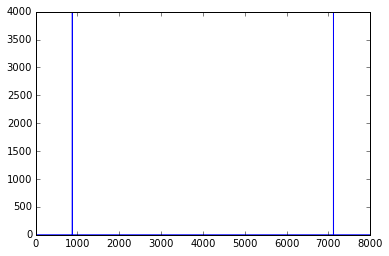

 Decimando por 3. Pressione [Enter] p/ iniciar



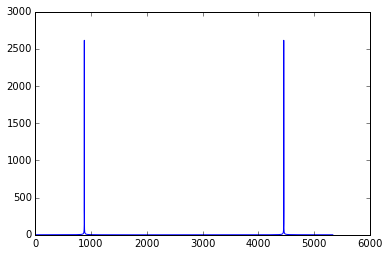

 Decimando por 5. Pressione [Enter] p/ iniciar



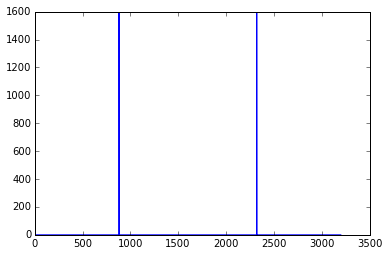

 Decimando por 7. Pressione [Enter] p/ iniciar



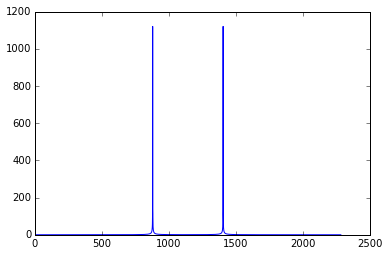

 Decimando por 8. Pressione [Enter] p/ iniciar



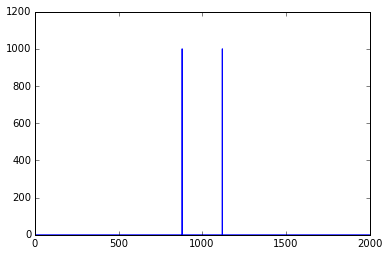

 Decimando por 9. Pressione [Enter] p/ iniciar



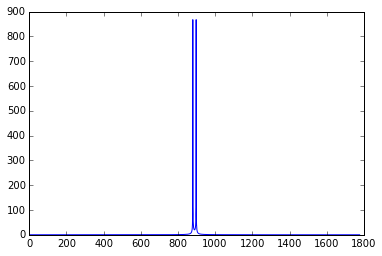

 Decimando por 10. Pressione [Enter] p/ iniciar



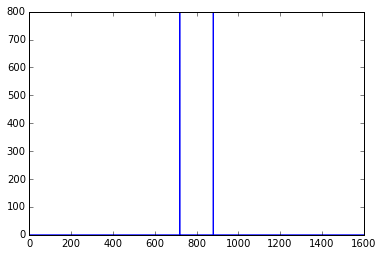

In [2]:
# gráficos serão incorporados ao notebook
% pylab inline
fatores = [2,3,5,7,8,9,10]
for fat in fatores:
    print 'Decimando por %d. ' % fat,
    raw_input('Pressione [Enter] p/ iniciar\n')   # aguardando a tecla [Enter]
    tomdec = tom[::fat]                           # tom decimado
    plot(abs(fft.fft(tomdec))); show()
    toca(tomdec,Fs)                               # reproduz o tom decimado


Descreva exatamente que frequência é produzida por cada um dos fatores de decimação. Descreva o que está acontecendo quando o sinal começa a diminuir em frequência. Como chamamos isso? Responda levando em consideração o comportamento dos espectros.  Os picos mudam como esperado? Você observa algum vazamento espectral nesses gráficos?

### Mudança da taxa de reprodução

Agora vamos alterar a taxa (freq.) de reprodução.

In [5]:
toca(tom,int(Fs/1.9))

O comando anterior reproduz o sinal em 4000 amostras/seg (ao invés do padrão de 8000 amostras/seg). Com o que se parece o som reproduzido? Porque? <p>Experimente reproduzir o tom em taxas do tipo: Fs, 1.1\*Fs, 0.9\*Fs, 2\*Fs, Fs/2, Fs/3, Fs/4.
(escreva um pequeno *script* para facilitar a conclusão dessa tarefa.) <p>Descreva como o som produzido muda com estas taxas de amostragem, e porque? 

### Sinal Gorjeio (<i>Chirp</i>)

Agora vamos experimentar um sinal de gorjeio de pássaro, o qual muda sua frequência instantânea com o tempo. <p>Queremos um sinal que mude sua frequência no tempo, de modo que no tempo $t = 0$ a frequência seja $f_1$ Hz e no tempo $t = t_f$ a frequência seja $f_2$ Hz, com variação linear na frequência em função do tempo. Tal sinal é chamado de '*chirp*' linear. Para configurar os dados para tal sinal, precisamos dar uma olhada na relação entre frequência e fase. <p>Considere um sinal

$s(t)=cos(2\pi f_{0}t)$

O argumento para a função cosseno é sempre a fase (sem dimensão). Neste caso, o sinal deste cosseno é $\theta(t)=2\pi f_0t$. Observe que a frequência do sinal pode ser calculada por:

$$\frac{1}{2\pi} \frac{d\theta(t)}{dt}=f_0$$

Nesse caso, a frequência é constante. 
<p>Mais genericamente, podemos ter uma função de fase que não varia linearmente com o tempo, o que leva a uma frequência variante no tempo. Em geral, para uma função de fase $\theta(t)$ definimos como *frequência instantânea*:

$$f(t)=\frac{1}{2\pi} \frac{d\theta(t)}{dt}\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;(1)$$

Agora vamos definir como queremos nossa frequência instantânea. Façamos $f(t)$ denotar a frequência como uma função do tempo. Queremos $f(0)=f_1$ e $f(t_f)=f_2$, com variação linear entre elas. Podemos então escrever:

$$f(t)=f_1+\frac{f_2-f_1}{t_f}t\;\;$$  ou   $$\;\;f(t)=f_1+m.t\;\;$$ onde $$\;\;m=\frac{f_2-f_1}{t_f}t$$

Agora vamos usar isso no contexto da *frequência instantânea* definida na equação (1):

$$\frac{1}{2\pi} \frac{d\theta(t)}{dt}=f_1+m.t$$

ou $$\theta(t)=2\pi(f_1t+\frac{1}{2}m.t^2)$$

 Este é o argumento para a função cosseno que geraria esse sinal. Ou seja, nós usaríamos:

$$s(t) = cos(\theta(t)) = cos(2\pi t(f_1 + \frac{1}{2}m.t))$$

Observe que a quantidade que multiplica o tempo $t$ é $$f_1+\frac{m.t}{2}$$

No código abaixo, chamamos isso de frequência, embora não seja estritamente a frequência instantânea

In [ ]:
Fs = 8000
Ts = 1./Fs
tfinal = 4                   # tempo final
t = arange(0,tfinal,Ts)      # base temporal
f1 = 440                     # freq. inicial do gorjeio
f2 = 1000                    # freq. final do gorjeio
m = (f2-f1)/tfinal           # inclinação do gorjeio
f = f1 + m*t/2               # frequência variante com o tempo (linear)
gorjeio = cos(2*pi*f*t)

In [ ]:
toca(gorjeio,Fs);

Explique o que está acontecendo e por que isso funciona. 
<p>Agora mude as frequências inicial e final para $f_1$ = 2000 Hz e $f_2$ = 8000 Hz. Gere um gráfico da frequência e toque o sinal como antes. Qual é a frequência final percebida? Por que a frequência aumenta e depois diminui?

In [ ]:
# Seu código
f1 = 2000                    # freq. inicial do gorjeio
f2 = 8000                    # freq. final do gorjeio
m = (f2-f1)/tfinal           # inclinação do gorjeio
f = f1 + m*t/2               # frequência variante com o tempo (linear)
gorjeio = cos(2*pi*f*t)
toca(gorjeio,Fs);

In [ ]:
plot(abs(fft.fft(gorjeio))); show()

### Aliasing na Música

Agora vamos tentar o efeito aliasing numa música real. Existe um arquivo no sistema conhecido como handel, que tem um pedaço do Coro Aleluia. Você pode carregá-lo (na variável 'y') e reproduzi-lo

In [ ]:
handel = loadmat("handel.mat")
print handel['y']

In [ ]:
aleluia = handel['y']
Fs = 8192
toca(aleluia,Fs)

Para obter o efeito que o aliasing pode ter, experimente os seguintes comandos: 

In [ ]:
toca(aleluia[::2], Fs) 

In [ ]:
toca(aleluia[::2], Fs/2); 

In [ ]:
toca(aleluia[::3], Fs/3); 

In [ ]:
toca(aleluia[::4], Fs/4); 

In [ ]:
toca(aleluia[::5], Fs/5);

Descreva o efeito que esses comandos têm na reprodução da música e por que eles ocorrem. (Por exemplo, explique por que você obtém o coro de macacos no primeiro.) Por que tanto a decimação (como aleluia[::4]) e a alteração da taxa de amostragem (como Fs/4) são necessárias para manter as coisas corretamente.

### Fundamentação Teórica - Quantização

#### Modelo do Processo de Quantização 

<p>Vamos formular um modelo do processo de **quantização** (quantificação) a fim de se conhecer os efeitos dessa operação num sinal de amplitude contínua. Restringimos nossas considerações a um sinal discreto de valor real $x[k]$. Para mapear a amplitude contínua para uma representação quantizada, propõe-se o seguinte modelo:
$$x_Q[k]=g(\left \lfloor\, f(x[k])\right \rfloor)$$
onde $g(\cdot)$ e $f(\cdot)$ denotam funções de mapeamento de valor real e $\left\lfloor\cdot\right\rfloor$ denota uma operação de arredondamento. 
<p>O processo de quantização pode ser dividido em duas etapas:
<ol><li>**Quantização para frente**: O mapeamento $f(x[k])$ mapeia o sinal $x[k]$ de modo que ele fique adequado à operação de arredondamento. Isso pode ser um escalonamento do sinal ou um mapeamento não linear. O resultado da operação de arredondamento é um número inteiro $\left\lfloor f(x[k])\right\rfloor \in \mathbb{Z}$ que é denominado *índice de quantização*.</li>
<li>**Quantização inversa**: O mapeamento $g(\cdot)$ mapeia o *índice de quantização* para o valor quantizado $x_Q[k]$ tal que $x_Q[k]$ seja uma aproximação de $x[k]$. Isso pode ser uma operação de escalonamento ou não linear.</li></ol>

<p>O erro de quantização (ou ruído de quantização) $e[k]$ é definido como:$\;\;\;e[k] = x_Q[k] - x[k]$.
<p>Ou seja, o processo de quantização pode ser modelado adicionando-se o ruído de quantização ao sinal discreto:
<p><img src="modelo_quantizacao.png">

##### Exemplo

Para ilustrar o modelo proposto, a quantização de um período de um sinal senoidal é considerada: $x[k]=sen[\Omega_0k]$
<p>utilizando $f(x[k])=3.x[k]$ e $g(i)=i/3$. O arredondamento é realizado pela função inteira mais próxima ($ \left \| x  \right \|$). O sinal quantizado é então dado por: $$x_Q[k] = \frac{1}{3}\left\lfloor 3.sen[\Omega_0k] \right \rfloor$$ 

Populating the interactive namespace from numpy and matplotlib


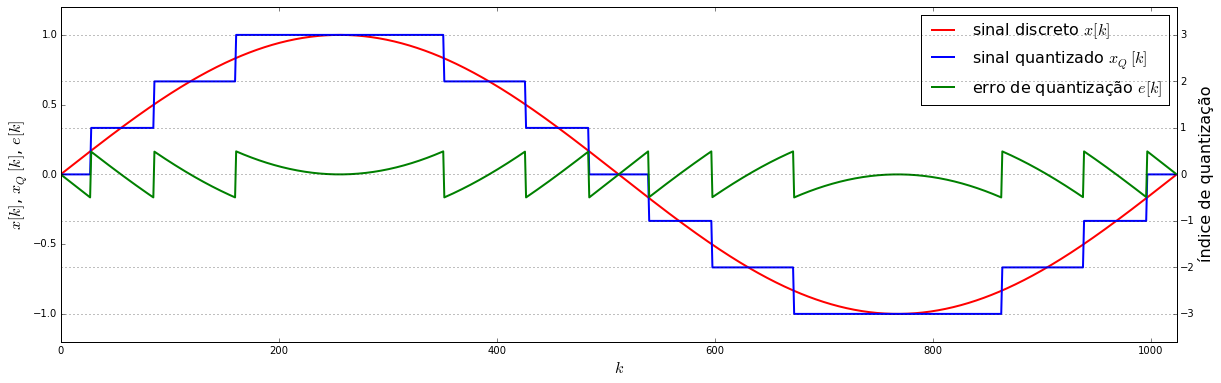

In [14]:
% pylab inline
from numpy import pi, sin, arange, round
from pylab import subplots

N = 1024              # qtde de amostras do sinal
n = arange(N)
x = sin(2*pi/N *n)    # sinal gerado
xi = round(3*x)       # sinal intermediário
xQ = 1./3*xi         # sinal quantizado
e = xQ - x

fig, ax1 = plt.subplots(figsize=(20,6))
ax2 = ax1.twinx()

ax1.plot(x, 'r', label=r'sinal discreto $x[k]$', linewidth=2)
ax1.plot(xQ,'b', label=r'sinal quantizado $x_Q[k]$', linewidth=2)
ax1.plot(e, 'g', label=u'erro de quantização $e[k]$', linewidth=2)
ax1.set_xlabel('$k$', fontsize=16)
ax1.set_ylabel(r'$x[k]$, $x_Q[k]$, $e[k]$',fontsize=16)
ax1.axis([0, N, -1.2, 1.2])
ax1.legend(fontsize=16)

ax2.set_ylim([-3.6, 3.6])
ax2.set_ylabel(u'índice de quantização',fontsize=16)
ax2.grid()

**Exercício**
<p><ul><li>Investigue o **ruído de quantização**, $e[k]$. Sua amplitude é limitada? </li>
<li>Se você representasse o índice de quantização (mostrado no eixo vertical à direita) por um número binário, quantos bits seriam necessários? </li>
<li>Experimente operações de arredondamento diferentes de *round()*, tais como: floor() e ceil(). O que muda?</li></ul>

**Conclusão**: a quantização é um processo inerentemente irreversível e não linear.

#### Quantizador Linear Uniforme

As características do quantificador dependem das funções de mapeamento $f(⋅)$, $g(⋅)$ e da operação de arredondamento $\left\lfloor\cdot\right\rfloor$. Um quantizador é dito ser **linear** quando as suas funções de mapeamento são lineares. 
<p>Um quantizador **uniforme** de $L$ bits, divide a *Faixa de Valores de Amplitude* (R) do sinal de entrada em $2^L-1$ passos de quantização (*quantum*) de tamanhos iguais:<p>$$q=\frac{R}{2^L}$$
<p>Os quantificadores podem ser descritos por sua característica de entrada/saída não linear<p>$$x_Q[k]=\textbf{Q}\{x[k]\}$$ <p>onde $\textbf{Q}\{\cdot\}$ indica o processo de quantização. <p>Na quantização uniforme linear é comum diferenciar entre duas curvas características, as chamadas *mid-tread* (meio passo) e *mid-rise* (meia subida).

##### Mid-Tread

O termo *mid-tread* se deve ao fato de que valores menores $|x[k]|<\frac{Q}{2}$ são mapeados para zero.<p>Tem relação entrada/saída do tipo: 
$$x_Q[k]=q.\left\lfloor\frac{x[k]}{q}+\frac{1}{2}\right\rfloor$$

onde $q$ é o *quantum* (tamanho do passo de quantização) e $\left\lfloor\cdot\right\rfloor$ é a função *floor()* que mapeia um número real no maior número inteiro não maior que seu argumento. 
<p>Sem restringir $x[k]$ em amplitude, os índices de quantização resultantes formam um conjunto infinito contável de valores. Para um número finito de índices de quantização, o sinal de entrada deve ser limitado a uma faixa de amplitudes mínima e máxima: $x_{min}<x[k]<x_{max}$ antes da quantização.
<p>A característica de quantização resultante de um quantizador uniforme linear *mid-tread* é mostrada a seguir.
<p><img src="carac_mid_tread.png">

#### Exemplo

Vamos simular a quantização de um período do sinal senoidal $x[k]=A.sen(\Omega_0⋅k)$ por um quantizador *mid-tread*. O parâmetro $A$ indica a amplitude do sinal, e nesse caso, $x_{min}=-A$ e $x_{max}=A$ são os menores e maiores valores de saída do quantizador, respectivamente.

Populating the interactive namespace from numpy and matplotlib


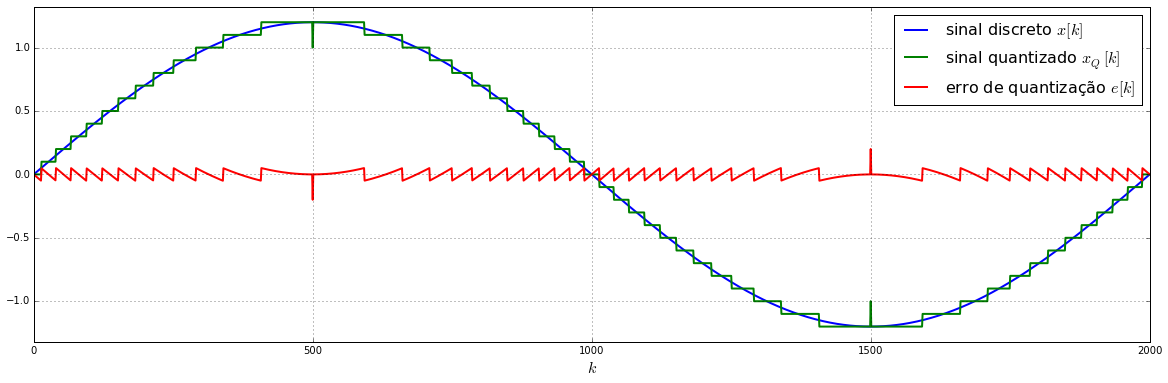

In [6]:
% pylab inline
from numpy import arange, sin, pi, copy, where, sign, floor
from pylab import figure, plot, xlabel, axis, legend, grid

def quantizacao_uniforme_midtread(x,q):
    x = copy(x)                                       # cria um novo vetor x (aloca novas posições de memória)
    indices = where(abs(x) >= 1)                      # limitador de amplitudes (localiza valores de 'x' entre -1 e 1)
    x[indices] = sign(x[indices])                     # atribui a todos os valores localizados amplitudes -1 ou 1
    xQ = q * floor(x/q + 0.5)                         # quantização linear uniforme com caract. mid-tread
    return xQ

def plota_sinais(x,amplit,qtdam,xQ):
    e = xQ - x                                        # sinal erro de quantização
    figure(figsize=(20,6))
    plot(x, label=r'sinal discreto $x[k]$', linewidth=2)
    plot(xQ,label=r'sinal quantizado $x_Q[k]$', linewidth=2)
    plot(e, label=u'erro de quantização $e[k]$', linewidth=2)
    xlabel(r'$k$', fontsize=16); axis([0, qtdam, -1.1*amplit, 1.1*amplit]); legend(fontsize=16); grid()

A = 1.2                                                # amplitude de pico do sinal
q = 0.1                                                # quantum (passo da quantização)
N = 2000                                               # qtde de amostras
x = A * sin(2*pi/N * arange(N))                        # gerando o sinal senoidal discreto
xQ = quantizacao_uniforme_midtread(x,q)                # quantiza o sinal 'x'
plota_sinais(x,A,N,xQ)

**Exercício**:  Altere o passo de quantização **q** e a amplitude **A** do sinal. Qual efeito isso tem no erro de quantização?

##### Mid-Rise

O termo *mid-rise* se deve ao fato de que $x[k]=0$ não é mapeado para zero. Pequenos valores positivos/negativos em torno de zero são mapeados para $±\frac{q}{2}$.
<p>Tem relação entrada/saída do tipo: 
$$x_Q[k]=q.\left (\left\lfloor\frac{x[k]}{q}\right\rfloor+\frac{1}{2}\right )$$

<p>A característica de quantização resultante de um quantizador uniforme linear *mid-rise* é mostrada a seguir.
<p><img src="carac_mid_rise.png">

#### Exemplo

O exemplo mostrado acima é agora avaliado para a característica meia subida (*mid-rise*).

Populating the interactive namespace from numpy and matplotlib


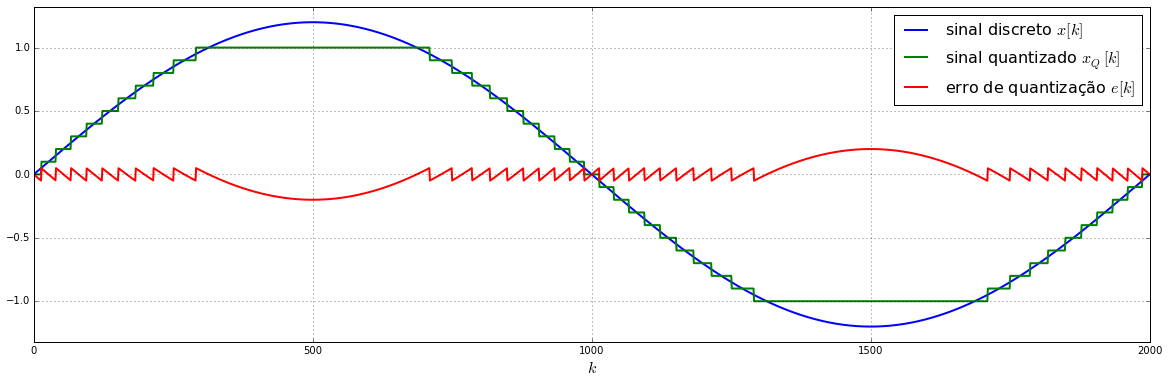

In [5]:
% pylab inline
from numpy import arange, sin, pi, copy, where, sign, floor
from pylab import figure, plot, xlabel, axis, legend, grid

def quantizacao_uniforme_midtrise(x,q):
    x = copy(x)                                       # cria um novo vetor x (aloca novas posições de memória)
    indices = where(abs(x) >= 1)                      # limitador de amplitudes (localiza valores de 'x' entre -1 e 1)
    x[indices] = sign(x[indices])                     # atribui a todos os valores localizados amplitudes -1 ou 1
    xQ = q * floor(x/q) + 0.5                         # quantização linear uniforme com caract. mid-rise
    return xQ

def plota_sinais(x,amplit,qtdam,xQ):
    e = xQ - x                                        # sinal erro de quantização
    figure(figsize=(20,6))
    plot(x, label=r'sinal discreto $x[k]$', linewidth=2)
    plot(xQ,label=r'sinal quantizado $x_Q[k]$', linewidth=2)
    plot(e, label=u'erro de quantização $e[k]$', linewidth=2)
    xlabel(r'$k$', fontsize=16); axis([0, qtdam, -1.1*amplit, 1.1*amplit]); legend(fontsize=16); grid()

A = 1.2                                                # amplitude de pico do sinal
q = 0.1                                                # quantum (passo da quantização)
N = 2000                                               # qtde de amostras
x = A * sin(2*pi/N * arange(N))                        # gerando o sinal senoidal discreto
xQ = quantizacao_uniforme_midtrise(x,q)                # quantiza o sinal 'x'
plota_sinais(x,A,N,xQ)

**Exercício**: Quais são as diferenças entre as curvas características *mid-tread* e *mid-rise* para o exemplo dado?

By **Prof. Cláudio A. Fleury**, Fev/19.